In [1]:
import pandas as pd
import numpy as np

# Loading and Treating the data

In [3]:
df = pd.read_csv("SWaT.A3_dataset_Jul_19_labelled.csv", header=1, skiprows=[2])

C:\Users\henri\AppData\Local\Temp\ipykernel_20208\2227756608.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SWaT.A3_dataset_Jul_19_labelled.csv", header=1, skiprows=[2])


In [5]:
df["Attack"].replace(np.nan, "benign", inplace=True)
df["Label"].replace(np.nan, 0, inplace=True)
df = df.rename(columns={"GMT +0": "Time"})
df["Time"] = df["Time"].apply(lambda x: pd.to_datetime(x).timestamp()).astype(int)

In [6]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,1563597000,benign,0.0,0.0,729.8658,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
1,1563597001,benign,0.0,0.0,729.4340,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
2,1563597002,benign,0.0,0.0,729.1200,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
3,1563597003,benign,0.0,0.0,728.6882,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
4,1563597004,benign,0.0,0.0,727.7069,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1


Replacing columns with dictionaries in strings with one column for each key in said dictionary

In [7]:
for name in df.columns:
    if len(name) >= 2 and name[0:2] == "LS":
        object_list = df[name].tolist()
        object_list = [eval(obj.replace("'", "\"")) for obj in object_list]
        for key_name in object_list[0].keys():
            values = [obj[key_name] for obj in object_list]
            df[name + "_" + key_name] = values
        df = df.drop(name, axis=1)

In [8]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 603_Value,LSL 601_IsSystem,LSL 601_Name,LSL 601_Value,LSL 602_IsSystem,LSL 602_Name,LSL 602_Value,LSL 603_IsSystem,LSL 603_Name,LSL 603_Value
0,1563597000,benign,0.0,0.0,729.8658,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
1,1563597001,benign,0.0,0.0,729.4340,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
2,1563597002,benign,0.0,0.0,729.1200,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
3,1563597003,benign,0.0,0.0,728.6882,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1
4,1563597004,benign,0.0,0.0,727.7069,1,3,2,1,142.527557,...,0,False,Inactive,0,False,Inactive,0,False,Active,1


Removing columns with constant value

In [9]:
df = df.loc[:, (df != df.iloc[0]).any()] 

In [10]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,...,FIT 503,FIT 504,MV 501,PIT 501,PIT 502,PIT 503,FIT 601,P601 Status,LSH 601_Name,LSH 601_Value
0,1563597000,benign,0.0,0.0,729.8658,1,3,2,142.527557,9.293002,...,0.623628,0.213432,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
1,1563597001,benign,0.0,0.0,729.4340,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
2,1563597002,benign,0.0,0.0,729.1200,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
3,1563597003,benign,0.0,0.0,728.6882,1,3,2,142.527557,9.289157,...,0.623628,0.212792,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
4,1563597004,benign,0.0,0.0,727.7069,1,3,2,142.527557,9.289157,...,0.623628,0.214009,2,167.601257,2.963509,119.921173,0.00032,1,Active,1


In [11]:
df["Label"].unique()

array([0., 1.])

We can see that the values of the Label column should be integers

In [12]:
df["Label"] = df["Label"].astype(int)

In [13]:
df.head(5)

,Time,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,...,FIT 503,FIT 504,MV 501,PIT 501,PIT 502,PIT 503,FIT 601,P601 Status,LSH 601_Name,LSH 601_Value
0,1563597000,benign,0,0.0,729.8658,1,3,2,142.527557,9.293002,...,0.623628,0.213432,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
1,1563597001,benign,0,0.0,729.4340,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
2,1563597002,benign,0,0.0,729.1200,1,3,2,142.527557,9.293002,...,0.623628,0.212984,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
3,1563597003,benign,0,0.0,728.6882,1,3,2,142.527557,9.289157,...,0.623628,0.212792,2,167.601257,2.963509,119.921173,0.00032,1,Active,1
4,1563597004,benign,0,0.0,727.7069,1,3,2,142.527557,9.289157,...,0.623628,0.214009,2,167.601257,2.963509,119.921173,0.00032,1,Active,1


One hot encoding non-numerical columns

In [14]:
df = pd.get_dummies(data=df, columns=list(df.select_dtypes(['object']).columns))

In [15]:
df.head(5)

,Time,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,AIT 203,...,FIT 601,P601 Status,LSH 601_Value,Attack_Spoofing,Attack_Switch_ON,Attack_Switch_close,Attack_Switch_off,Attack_benign,LSH 601_Name_Active,LSH 601_Name_Inactive
0,1563597000,0,0.0,729.8658,1,3,2,142.527557,9.293002,198.077423,...,0.00032,1,1,False,False,False,False,True,True,False
1,1563597001,0,0.0,729.4340,1,3,2,142.527557,9.293002,198.385025,...,0.00032,1,1,False,False,False,False,True,True,False
2,1563597002,0,0.0,729.1200,1,3,2,142.527557,9.293002,198.436300,...,0.00032,1,1,False,False,False,False,True,True,False
3,1563597003,0,0.0,728.6882,1,3,2,142.527557,9.289157,198.667000,...,0.00032,1,1,False,False,False,False,True,True,False
4,1563597004,0,0.0,727.7069,1,3,2,142.527557,9.289157,198.897720,...,0.00032,1,1,False,False,False,False,True,True,False


# Visualisation

# Outlier detection

In [16]:
from sklearn.ensemble import IsolationForest

df_no_label = df.drop(["Label", "Attack_Spoofing", "Attack_Switch_ON", "Attack_Switch_close", "Attack_Switch_off", "Attack_benign"], axis=1)

contamination = len(df[(df["Label"] != 0)]) / len(df)


predictor = IsolationForest(contamination = contamination, random_state = 42)
predictor.fit(df_no_label)
outliers = predictor.predict(df_no_label)

print(f"Number of outliers found: {sum(outliers == -1)}")
df_no_label["outliers"] = outliers
correct_outliers = len(df[df["Label"] == 1][df_no_label["outliers"] == -1])
print(f"Correctly identified outliers: {correct_outliers}")

Number of outliers found: 2553
Correctly identified outliers: 883


C:\Users\henri\AppData\Local\Temp\ipykernel_20208\1312268490.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  correct_outliers = len(df[df["Label"] == 1][df_no_label["outliers"] == -1])


In [17]:
from sklearn.neighbors import LocalOutlierFactor


predictor = LocalOutlierFactor(contamination = contamination)
outliers = predictor.fit_predict(df_no_label)

print(f"Number of outliers found: {sum(outliers == -1)}")
df_no_label["lof_outliers"] = outliers
correct_outliers = len(df[df["Label"] == 1][df_no_label["lof_outliers"] == -1])
print(f"Correctly identified outliers: {correct_outliers}")

Number of outliers found: 2553
Correctly identified outliers: 521


C:\Users\henri\AppData\Local\Temp\ipykernel_20208\536008177.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  correct_outliers = len(df[df["Label"] == 1][df_no_label["lof_outliers"] == -1])


## LSTM 

In [42]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [43]:
df_numerical = df.select_dtypes(include=['number'])

# Divisez le DataFrame en ensembles d'entraînement et de test
train_df, test_df = train_test_split(df_numerical, test_size=0.2, random_state=42)

# Les ensembles d'entraînement et de test contiennent toutes les colonnes, y compris les caractéristiques et le label
X_train = train_df.drop("Label", axis=1)
y_train = train_df["Label"]

X_test = test_df.drop("Label", axis=1)
y_test = test_df["Label"]

In [44]:
# Construction du modèle LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=False),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [45]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Évaluation du modèle
loss = model.evaluate(X_test, y_test)
print(f'Loss on test data: {loss}')

# Faire des prédictions
predictions = model.predict(X_test)

Epoch 1/50
375/375 [==============================] - 10s 19ms/step - loss: 0.1191 - accuracy: 0.8456 - val_loss: 0.0832 - val_accuracy: 0.8850
Epoch 2/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0730 - accuracy: 0.8965 - val_loss: 0.0709 - val_accuracy: 0.9030
Epoch 3/50
375/375 [==============================] - 6s 17ms/step - loss: 0.0669 - accuracy: 0.9053 - val_loss: 0.0640 - val_accuracy: 0.9013
Epoch 4/50
375/375 [==============================] - 7s 17ms/step - loss: 0.0609 - accuracy: 0.9068 - val_loss: 0.0575 - val_accuracy: 0.9077
Epoch 5/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0576 - accuracy: 0.9089 - val_loss: 0.0530 - val_accuracy: 0.9080
Epoch 6/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0532 - accuracy: 0.9120 - val_loss: 0.0518 - val_accuracy: 0.9140
Epoch 7/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0505 - accuracy: 0.9135 - val_loss: 0.0476 - val_accuracy: 0.911

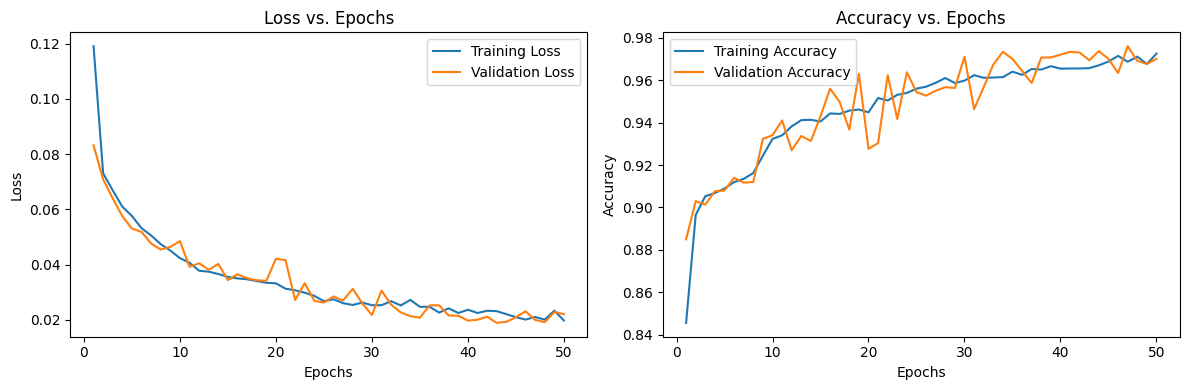

In [46]:
# Extraire les données d'entraînement
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Tracer la courbe de la perte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tracer la courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()